#### 1) Gaza

--- Publisher Counts ---
AAP: 21
AFP Fact Check: 13
Full Fact: 12
Australian Associated Press: 12
Logically Facts: 10
NewsMobile: 5
India Today: 4
FactCheck.org: 3
Lighthouse Journalism: 3
PolitiFact: 3
FACTLY: 2
Newschecker: 2
The Quint: 2
NDTV: 2
Lead Stories: 2
BOOM Fact Check: 2
Snopes.com: 2
annie lab: 2
Snopes: 2
DW: 1
Check Your Fact: 1
StopFake: 1
EastMojo: 1
CheckYourFact: 1
VOA: 1

--- Textual Rating Counts ---
False: 36
Misleading: 21
Fake: 3
False. the injured palestinian journalist shares the same name as a sydney woman.: 3
False. more than four countries have accepted palestinians.: 3
False. states cannot be charged with war crimes, only individuals.: 3
Distorts the facts: 2
False. the image has been miscaptioned and the child is suffering from a skin disease.: 2
Incorrect. the image is more than a year old and is of an israeli airstrike on gaza city.: 2
This picture is actually from yemen in 2020.: 2
True: 2
False. photos from the u.s. military show eric smith attended d

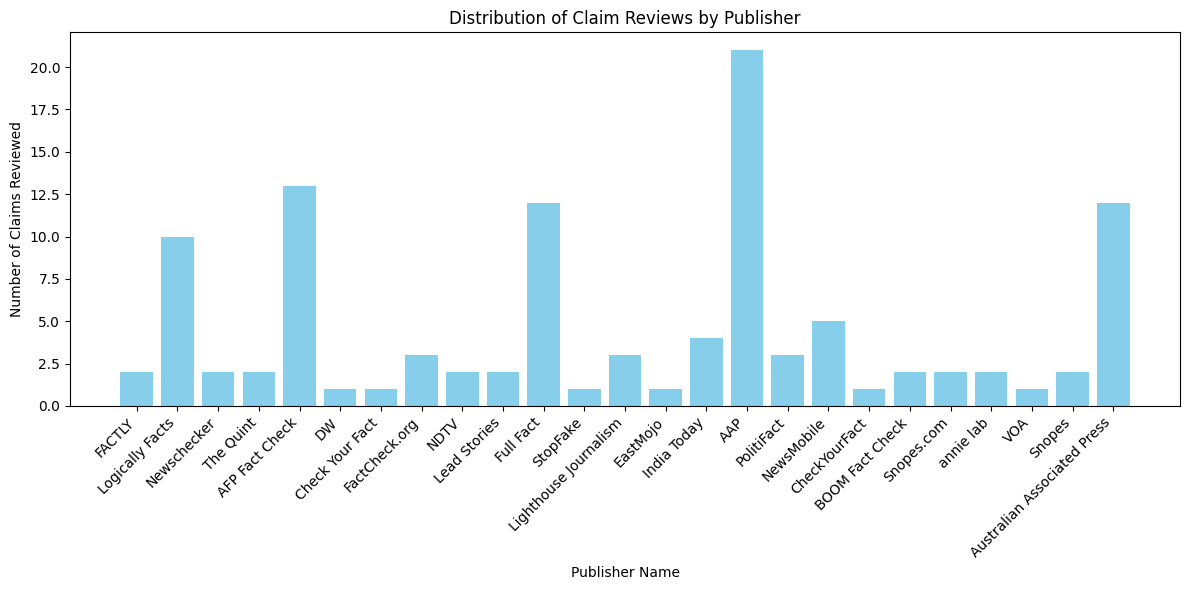

/var/folders/yf/8jt3z6xx21z0rv6lrj7sdr800000gn/T/ipykernel_77983/2819313986.py:90: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


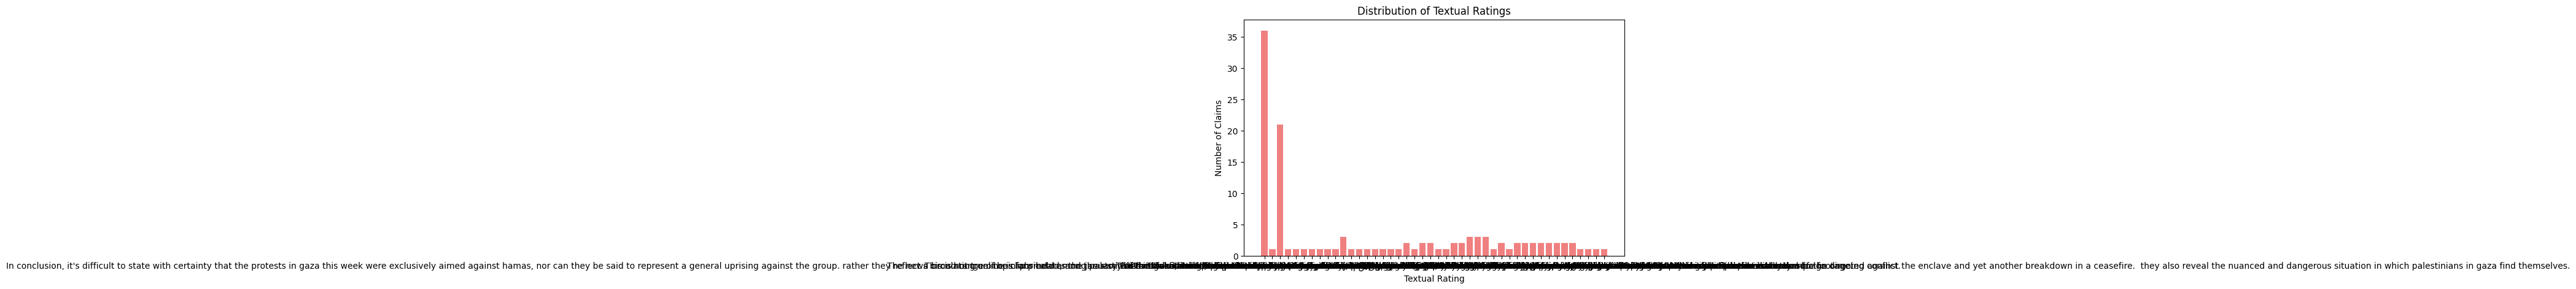

In [1]:
import json
from collections import Counter
import matplotlib.pyplot as plt
import os # For handling potential file paths

# --- 1. Load Data ---
# Option A: Use the sample data defined above
# json_data = data

# Option B: Load data from a JSON file (if you have one)
file_path = 'claims_gaza_en_01_07_24_100425_119_claims_28_misleading_claims.json'
try:
    with open(file_path, 'r', encoding='utf-8') as f:
        json_data = json.load(f)
except FileNotFoundError:
    print(f"Error: File not found at {file_path}")
    exit()
except json.JSONDecodeError:
    print(f"Error: Could not decode JSON from {file_path}")
    exit()


# --- 2. Extract Publisher Names and Ratings ---
publisher_names = []
textual_ratings = []

# Check if 'claims' key exists and is a list
if 'claims' in json_data and isinstance(json_data['claims'], list):
    for claim in json_data['claims']:
        # Check if 'claimReview' key exists and is a list
        if 'claimReview' in claim and isinstance(claim['claimReview'], list):
            for review in claim['claimReview']:
                # Extract publisher name
                if 'publisher' in review and isinstance(review['publisher'], dict) and 'name' in review['publisher']:
                    publisher_names.append(review['publisher']['name'])
                else:
                    print("Warning: Missing publisher name in a review.") # Optional warning

                # Extract textual rating
                if 'textualRating' in review:
                    # Standardize capitalization (e.g., "FALSE" -> "False")
                    rating = review['textualRating'].capitalize()
                    textual_ratings.append(rating)
                else:
                     print("Warning: Missing textual rating in a review.") # Optional warning
else:
    print("Error: 'claims' key not found or is not a list in the JSON data.")
    exit()

# --- 3. Count Frequencies ---
publisher_counts = Counter(publisher_names)
rating_counts = Counter(textual_ratings)

print("--- Publisher Counts ---")
for name, count in publisher_counts.most_common():
    print(f"{name}: {count}")

print("\n--- Textual Rating Counts ---")
for rating, count in rating_counts.most_common():
    print(f"{rating}: {count}")


# --- 4. Visualize Distributions ---

# Check if there's data to plot
if not publisher_counts or not rating_counts:
    print("\nNo data extracted to plot.")
else:
    # Plot Publisher Distribution
    plt.figure(figsize=(12, 6)) # Adjust figure size for potentially many publishers
    pub_names = list(publisher_counts.keys())
    pub_values = list(publisher_counts.values())
    plt.bar(pub_names, pub_values, color='skyblue')
    plt.xlabel("Publisher Name")
    plt.ylabel("Number of Claims Reviewed")
    plt.title("Distribution of Claim Reviews by Publisher")
    plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
    plt.tight_layout() # Adjust layout to prevent labels overlapping
    plt.show()

    # Plot Rating Distribution
    plt.figure(figsize=(8, 5))
    rat_names = list(rating_counts.keys())
    rat_values = list(rating_counts.values())
    plt.bar(rat_names, rat_values, color='lightcoral')
    plt.xlabel("Textual Rating")
    plt.ylabel("Number of Claims")
    plt.title("Distribution of Textual Ratings")
    plt.xticks(rotation=0) # Usually fewer ratings, rotation might not be needed
    plt.tight_layout()
    plt.show()


Info: Excluded 49 ratings longer than 4 tokens.

--- Publisher Counts ---
AAP: 21
AFP Fact Check: 13
Full Fact: 12
Australian Associated Press: 12
Logically Facts: 10
NewsMobile: 5
India Today: 4
FactCheck.org: 3
Lighthouse Journalism: 3
PolitiFact: 3
FACTLY: 2
Newschecker: 2
The Quint: 2
NDTV: 2
Lead Stories: 2
BOOM Fact Check: 2
Snopes.com: 2
annie lab: 2
Snopes: 2
DW: 1
Check Your Fact: 1
StopFake: 1
EastMojo: 1
CheckYourFact: 1
VOA: 1

--- Filtered Textual Rating Counts ---
False: 36
Misleading: 21
Fake: 3
Distorts the facts: 2
True: 2
Altered photo/video: 1
No evidence: 1
No receipts: 1
Altered media: 1
مضلّل: 1
Ai image: 1
Mostly false: 1
Salah: 1


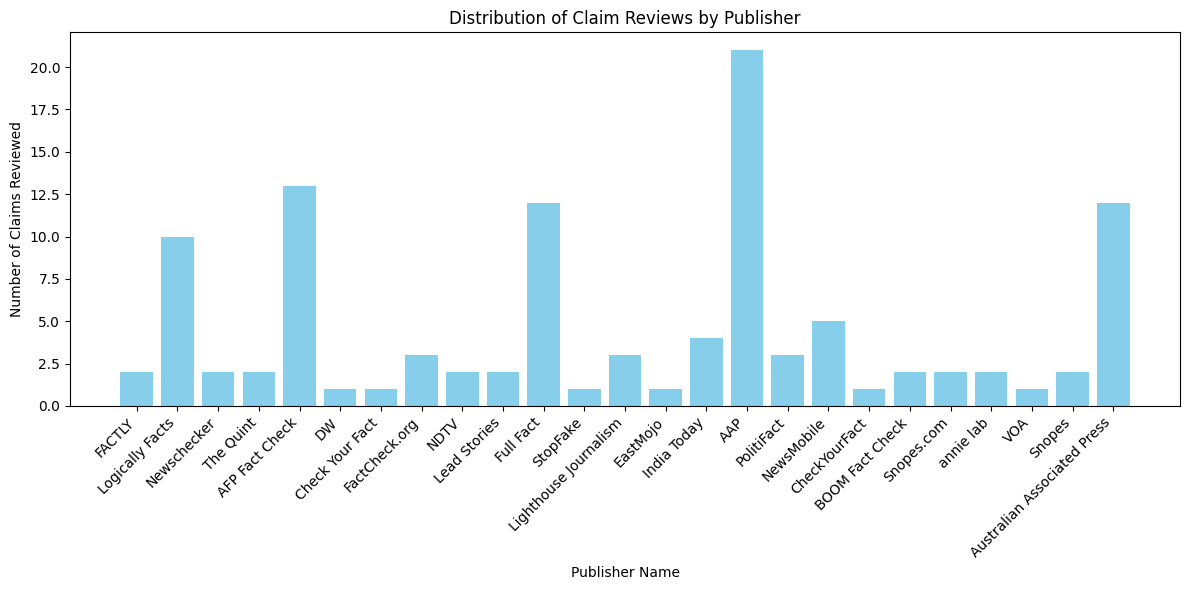

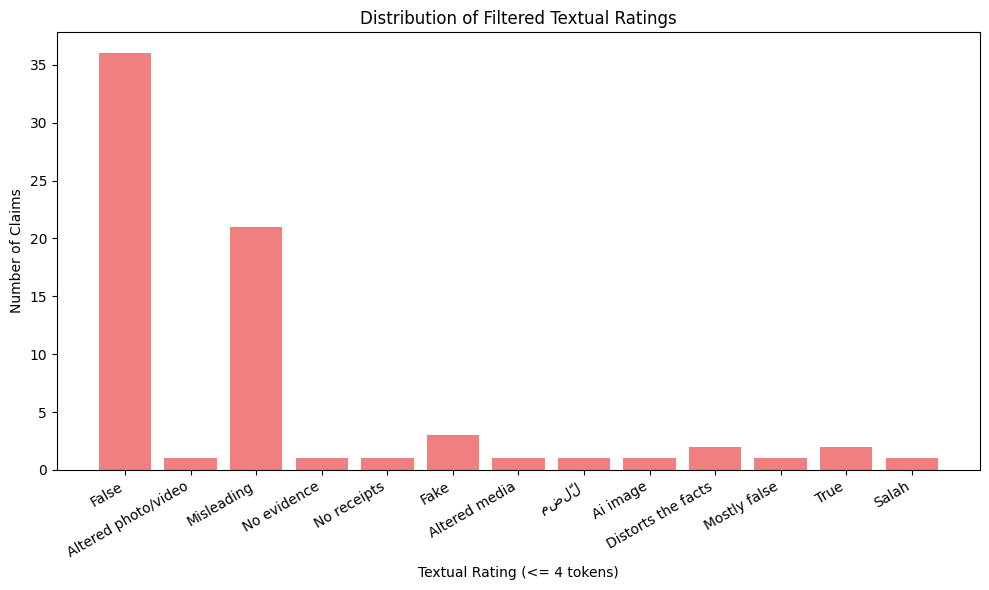

In [2]:
# --- Configuration ---
MAX_RATING_TOKENS = 4 # Maximum allowed tokens for a rating to be included



# --- 2. Extract Publisher Names and Filtered Ratings ---
publisher_names = []
textual_ratings = []
excluded_rating_count = 0 # Optional: Count how many ratings were excluded

# Check if 'claims' key exists and is a list
if 'claims' in json_data and isinstance(json_data['claims'], list):
    for claim in json_data['claims']:
        # Check if 'claimReview' key exists and is a list
        if 'claimReview' in claim and isinstance(claim['claimReview'], list):
            for review in claim['claimReview']:
                # Extract publisher name (remains the same)
                if 'publisher' in review and isinstance(review['publisher'], dict) and 'name' in review['publisher']:
                    publisher_names.append(review['publisher']['name'])
                else:
                    print("Warning: Missing publisher name in a review.")

                # Extract and Filter textual rating
                if 'textualRating' in review and isinstance(review['textualRating'], str):
                    raw_rating = review['textualRating']
                    # Count tokens by splitting on whitespace
                    token_count = len(raw_rating.split())

                    # Apply the filter
                    if token_count <= MAX_RATING_TOKENS:
                        # Standardize capitalization (e.g., "partly True" -> "Partly true")
                        rating = raw_rating.capitalize()
                        textual_ratings.append(rating)
                    else:
                        excluded_rating_count += 1
                        # Optional: Print excluded ratings for verification
                        # print(f"Info: Excluding long rating (>{MAX_RATING_TOKENS} tokens): '{raw_rating}'")

                else:
                     print("Warning: Missing or non-string textual rating in a review.")
else:
    print("Error: 'claims' key not found or is not a list in the JSON data.")
    exit()

print(f"\nInfo: Excluded {excluded_rating_count} ratings longer than {MAX_RATING_TOKENS} tokens.")

# --- 3. Count Frequencies ---
publisher_counts = Counter(publisher_names)
rating_counts = Counter(textual_ratings) # Counts only the filtered ratings

print("\n--- Publisher Counts ---")
if publisher_counts:
    for name, count in publisher_counts.most_common():
        print(f"{name}: {count}")
else:
    print("No publisher data found.")


print("\n--- Filtered Textual Rating Counts ---")
if rating_counts:
    for rating, count in rating_counts.most_common():
        print(f"{rating}: {count}")
else:
    print("No ratings met the criteria (or no ratings found).")


# --- 4. Visualize Distributions ---

# Check if there's data to plot
if not publisher_counts and not rating_counts:
    print("\nNo data extracted to plot.")
else:
    # Plot Publisher Distribution (remains the same)
    if publisher_counts:
        plt.figure(figsize=(12, 6))
        pub_names = list(publisher_counts.keys())
        pub_values = list(publisher_counts.values())
        plt.bar(pub_names, pub_values, color='skyblue')
        plt.xlabel("Publisher Name")
        plt.ylabel("Number of Claims Reviewed")
        plt.title("Distribution of Claim Reviews by Publisher")
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
    else:
        print("\nSkipping publisher plot (no data).")

    # Plot Filtered Rating Distribution
    if rating_counts:
        plt.figure(figsize=(10, 6)) # Adjusted size slightly
        rat_names = list(rating_counts.keys())
        rat_values = list(rating_counts.values())
        plt.bar(rat_names, rat_values, color='lightcoral')
        plt.xlabel(f"Textual Rating (<= {MAX_RATING_TOKENS} tokens)") # Updated label
        plt.ylabel("Number of Claims")
        plt.title("Distribution of Filtered Textual Ratings")
        plt.xticks(rotation=30, ha='right') # Rotate slightly if needed
        plt.tight_layout()
        plt.show()
    else:
        print("\nSkipping rating plot (no data matching criteria).")

#### 2) Israel


Info: Excluded 46 ratings longer than 4 tokens.

--- Publisher Counts ---
Logically Facts: 32
Full Fact: 31
AFP Fact Check: 29
India Today: 18
NewsMobile: 17
NewsMeter: 13
The Quint: 12
FACTLY: 10
Check Your Fact: 9
BOOM Fact Check: 8
USA Today: 8
Newschecker: 7
Lead Stories: 5
Snopes: 5
AAP: 5
PA Media: 5
Lighthouse Journalism: 4
PolitiFact: 3
Greece Fact Check: 3
CheckYourFact: 2
YouTurn: 2
VERIFYThis.com: 2
VOA: 2
Australian Associated Press: 2
PTI: 1
annie lab: 1
Alt News: 1
StopFake: 1
THIP Media: 1
EastMojo: 1
NDTV: 1
FactCheck.org: 1
Factcheck.bg: 1
Youturn: 1
Rappler: 1
في ميزان فرانس برس: 1
DigitEye India: 1
India TV News: 1

--- Filtered Textual Rating Counts ---
False: 140
Misleading: 70
Fake: 15
Mostly false: 9
Altered: 3
Half true: 3
Ai image: 2
Disinformation: 2
Altered photo/video: 1
Hard to categorise: 1
More items: 1
True: 1
Correct attribution: 1
Altered media: 1
July 2024: 1
Didn't say it: 1
Originated as satire: 1
Distorts the facts: 1
Not true.: 1


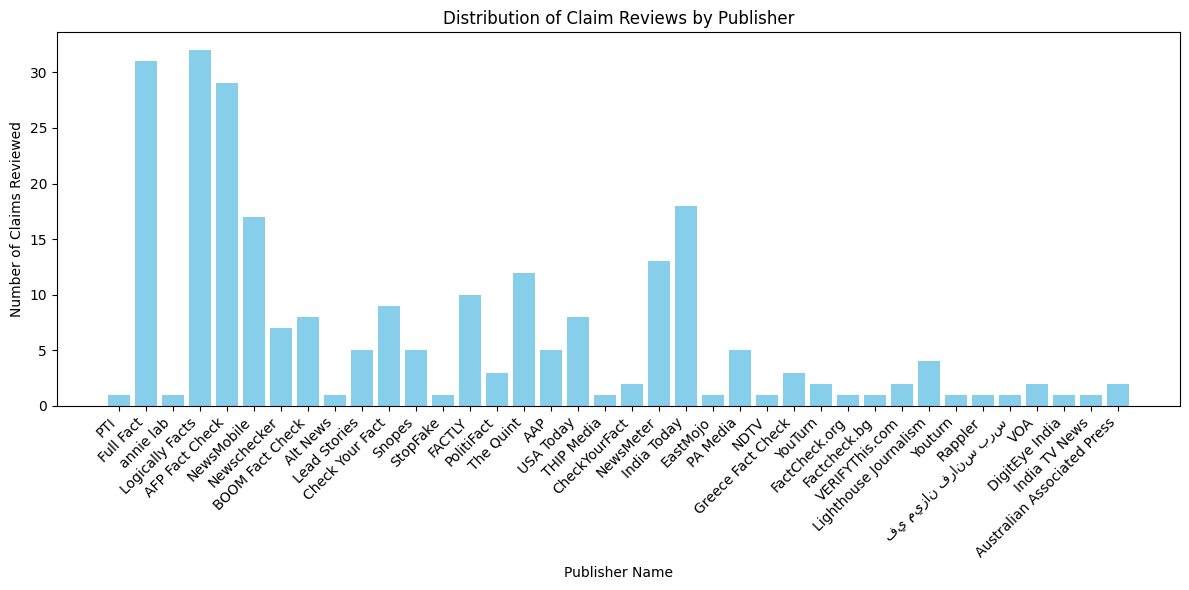

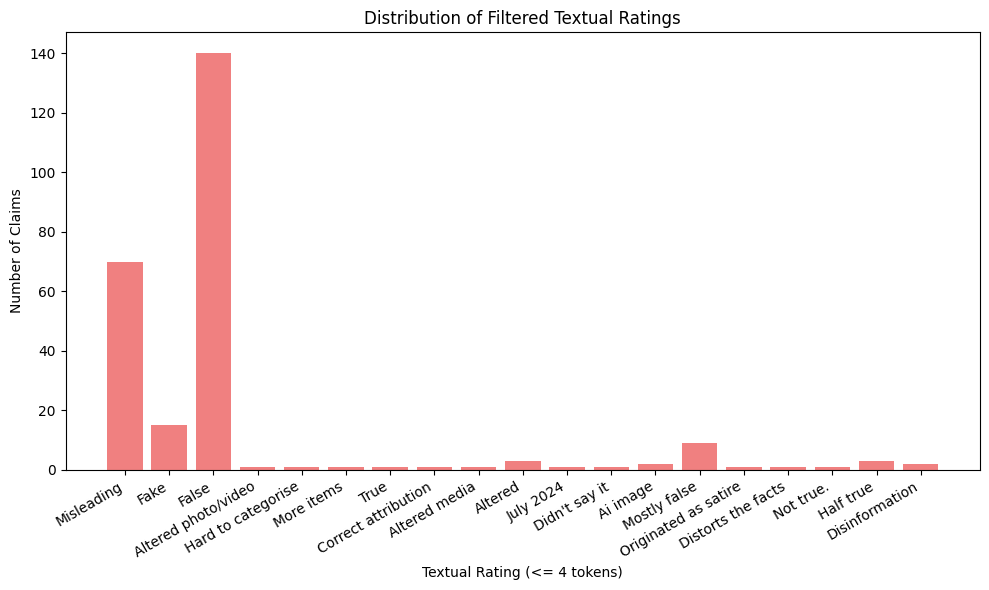

In [3]:
# Option B: Load data from a JSON file (if you have one)
file_path = 'claims_israel_en_01_07_24_300_claims_91_misleading_claims.json'
try:
    with open(file_path, 'r', encoding='utf-8') as f:
        json_data = json.load(f)
except FileNotFoundError:
    print(f"Error: File not found at {file_path}")
    exit()
except json.JSONDecodeError:
    print(f"Error: Could not decode JSON from {file_path}")
    exit()

# --- Configuration ---
MAX_RATING_TOKENS = 4 # Maximum allowed tokens for a rating to be included



# --- 2. Extract Publisher Names and Filtered Ratings ---
publisher_names = []
textual_ratings = []
excluded_rating_count = 0 # Optional: Count how many ratings were excluded

# Check if 'claims' key exists and is a list
if 'claims' in json_data and isinstance(json_data['claims'], list):
    for claim in json_data['claims']:
        # Check if 'claimReview' key exists and is a list
        if 'claimReview' in claim and isinstance(claim['claimReview'], list):
            for review in claim['claimReview']:
                # Extract publisher name (remains the same)
                if 'publisher' in review and isinstance(review['publisher'], dict) and 'name' in review['publisher']:
                    publisher_names.append(review['publisher']['name'])
                else:
                    print("Warning: Missing publisher name in a review.")

                # Extract and Filter textual rating
                if 'textualRating' in review and isinstance(review['textualRating'], str):
                    raw_rating = review['textualRating']
                    # Count tokens by splitting on whitespace
                    token_count = len(raw_rating.split())

                    # Apply the filter
                    if token_count <= MAX_RATING_TOKENS:
                        # Standardize capitalization (e.g., "partly True" -> "Partly true")
                        rating = raw_rating.capitalize()
                        textual_ratings.append(rating)
                    else:
                        excluded_rating_count += 1
                        # Optional: Print excluded ratings for verification
                        # print(f"Info: Excluding long rating (>{MAX_RATING_TOKENS} tokens): '{raw_rating}'")

                else:
                     print("Warning: Missing or non-string textual rating in a review.")
else:
    print("Error: 'claims' key not found or is not a list in the JSON data.")
    exit()

print(f"\nInfo: Excluded {excluded_rating_count} ratings longer than {MAX_RATING_TOKENS} tokens.")

# --- 3. Count Frequencies ---
publisher_counts = Counter(publisher_names)
rating_counts = Counter(textual_ratings) # Counts only the filtered ratings

print("\n--- Publisher Counts ---")
if publisher_counts:
    for name, count in publisher_counts.most_common():
        print(f"{name}: {count}")
else:
    print("No publisher data found.")


print("\n--- Filtered Textual Rating Counts ---")
if rating_counts:
    for rating, count in rating_counts.most_common():
        print(f"{rating}: {count}")
else:
    print("No ratings met the criteria (or no ratings found).")


# --- 4. Visualize Distributions ---

# Check if there's data to plot
if not publisher_counts and not rating_counts:
    print("\nNo data extracted to plot.")
else:
    # Plot Publisher Distribution (remains the same)
    if publisher_counts:
        plt.figure(figsize=(12, 6))
        pub_names = list(publisher_counts.keys())
        pub_values = list(publisher_counts.values())
        plt.bar(pub_names, pub_values, color='skyblue')
        plt.xlabel("Publisher Name")
        plt.ylabel("Number of Claims Reviewed")
        plt.title("Distribution of Claim Reviews by Publisher")
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
    else:
        print("\nSkipping publisher plot (no data).")

    # Plot Filtered Rating Distribution
    if rating_counts:
        plt.figure(figsize=(10, 6)) # Adjusted size slightly
        rat_names = list(rating_counts.keys())
        rat_values = list(rating_counts.values())
        plt.bar(rat_names, rat_values, color='lightcoral')
        plt.xlabel(f"Textual Rating (<= {MAX_RATING_TOKENS} tokens)") # Updated label
        plt.ylabel("Number of Claims")
        plt.title("Distribution of Filtered Textual Ratings")
        plt.xticks(rotation=30, ha='right') # Rotate slightly if needed
        plt.tight_layout()
        plt.show()
    else:
        print("\nSkipping rating plot (no data matching criteria).")

#### 3) Ukraine

#### 4) Russia